In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as skl_lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

from mpl_toolkits.mplot3d import axes3d
from sklearn.preprocessing import scale

# 1. 다중 선형 회귀(40점)

### 1-1.데이터 불러오기(5점)

In [4]:
advertising = pd.read_csv('advertising.csv')
advertising.head() # 정보 출력

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### 1-2. radio, tv 두 변수 다중 선형 회귀(15점)
radio와 tv의 coef, intercept 값 구하기

In [5]:
regress = skl_lm.LinearRegression()

X = advertising[['Radio', 'TV']]
y = advertising.Sales

regress.fit(X,y)
print('Radio와 TV의 계수:', regress.coef_)
print('절편:',regress.intercept_)

Radio와 TV의 계수: [0.10717457 0.05444896]
절편: 4.63087946409777


In [6]:
# 통계값 출력
advertising[['Radio', 'TV']].describe()

,Radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


### 1-3. 다중 선형 회귀 3d 시각화 (20점)
반응변수:sales <br>
설명변수 : tv, radio
<br>
scatter3D를 이용하세요

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.


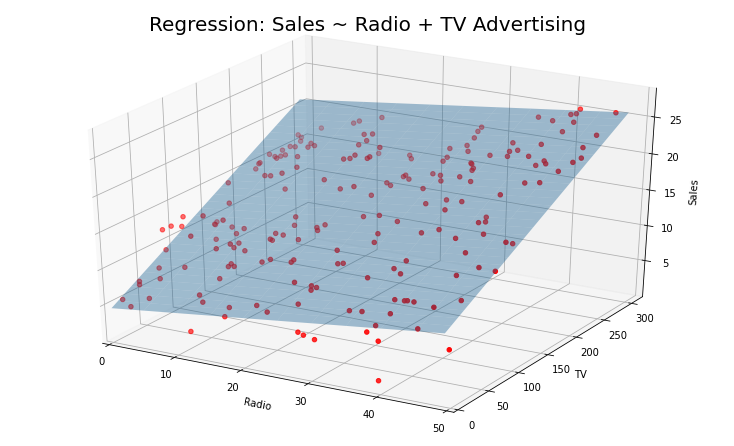

In [7]:
# 좌표 grid 생성
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regress.intercept_ + B1[i,j]*regress.coef_[0] + B2[i,j]*regress.coef_[1])

# plot 생성
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');

# 2. Multinomial Naive Bayes(25점)

### 2-1. multinomial naive bayes 모델 생성하기(10점)

In [8]:
from sklearn.naive_bayes import MultinomialNB # Multinomial Naive Bayes 라이브러리

X = np.array([[3, 4, 1, 2],  #키워드 출현빈도 수
              [3, 5, 1, 1], 
              [3, 3, 0, 4], 
              [3, 4, 1, 2], 
              [1, 2, 1, 4], 
              [0, 0, 5, 3], 
              [1, 2, 4, 1], 
              [1, 1, 4, 2], 
              [0, 1, 2, 5], 
              [2, 1, 2, 3]]) 
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) #정상메일:0 스팸메일:1

model= MultinomialNB().fit(X, y)

### 2-2. 예측하기 (15점)
[10,10,10,10] 와
[4,4,2,2] 은 스팸일 확률이 높은지 정상인 확률이 높은지 판단하세요

In [9]:
x_new = np.array([10,10,10,10])
print(model.predict_proba([x_new]))
x_new1 = np.array([4, 4, 2, 2]) 
print(model.predict_proba([x_new1]))

[[0.38848858 0.61151142]]
[[0.96466932 0.03533068]]


# 3. 로지스틱 회귀(35점)
### 3-1. 데이터 Smarket.csv 불러오기 (5점)

In [10]:
import statsmodels.formula.api as smf

In [11]:
df = pd.read_csv('Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)
df.describe()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


### 3-2. 로지스틱 회귀 모델 생성, 학습 (15점)
formula = 'Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume' 인 모델을 만들고 학습하세요

In [12]:
formula = 'Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume'
model = smf.glm(formula=formula, data=df, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Fri, 13 May 2022   Deviance:                       1727.6
Time:                                          04:38:23   Pearson chi2:                 1.25e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

### 3-3. predict, confusion matrix (15점)
위에서 만든 모델로 예측한 값을 predictions으로 정의하고 <br>
predictions_nominal = [ "Up" if x < 0.5 else "Down" for x in predictions] 을 설정하여 df['Direction']과의 confusion matrix 구하세요

In [13]:
predictions = result.predict()
predictions_nominal = [ "Up" if x < 0.5 else "Down" for x in predictions]
from sklearn.metrics import confusion_matrix
print(confusion_matrix(df["Direction"], predictions_nominal))

[[145 457]
 [141 507]]
